# Time-Series Analysis

## Data Preparation
1. If there are data from different instances of a metric (Ex: Cpu0, cpu1, cpu2 ...) from a single node, then we will concatenate by taking the average.
2. We just need two columns (timestamp and values).

In [2]:
import os
import pandas as pd
actual = pd.read_csv('/home/sridhar/DataAnalysis/pod18-node4/load/load-2022-06-19', index_col=False)
syn = pd.read_csv('/media/sf_UbuntuShare/syndata/node4/load.csv', index_col=False)

In [27]:
actual.head()

,epoch,shortterm,midterm,longterm
0,1.655651e+09,7.2,16.9,36.9
1,1.655651e+09,7.2,16.9,36.9
2,1.655651e+09,7.2,16.9,36.9
3,1.655651e+09,7.2,16.9,36.9
4,1.655651e+09,7.2,16.9,36.9


In [28]:
syn.head()

,epoch,shortterm,midterm,longterm
0,1655651103,6.61,589.06,686.278667
1,1655651104,6.61,297.83,589.172667
2,1655651105,6.61,6.61,492.040000
3,1655651106,6.61,6.61,394.956667
4,1655651107,6.61,6.61,297.860000


In [3]:
diff = actual.shape[0] - syn.shape[0]
print(diff)
actual = actual.drop(actual.index[(actual.shape[0] - diff):])
print(actual.shape[0])
print(syn.shape[0])

551
7000
7000


In [4]:
actual['epoch'] = pd.to_datetime(actual['epoch'],unit='s')
syn['epoch'] = pd.to_datetime(syn['epoch'],unit='s')
syn['epoch']

0      2022-06-19 15:05:03
1      2022-06-19 15:05:04
2      2022-06-19 15:05:05
3      2022-06-19 15:05:06
4      2022-06-19 15:05:07
               ...        
6995   2022-06-19 17:03:22
6996   2022-06-19 17:03:23
6997   2022-06-19 17:03:24
6998   2022-06-19 17:03:25
6999   2022-06-19 17:03:26
Name: epoch, Length: 7000, dtype: datetime64[ns]

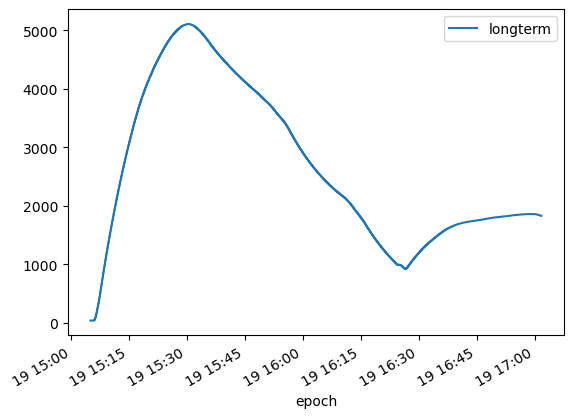

In [5]:
from matplotlib import pyplot
actual.plot(x='epoch',y='longterm')
pyplot.show()

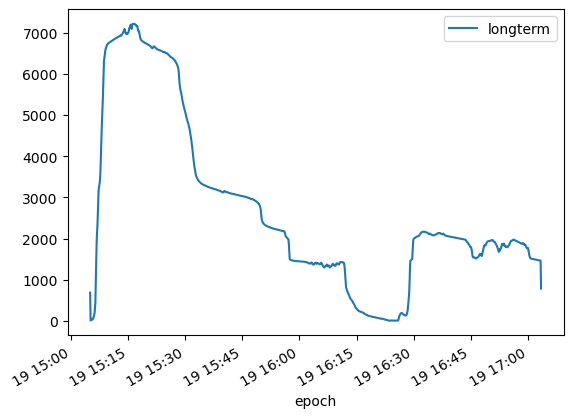

In [6]:
from matplotlib import pyplot
syn.plot(x='epoch',y='longterm')
pyplot.show()

## Autocorrelation

In [7]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

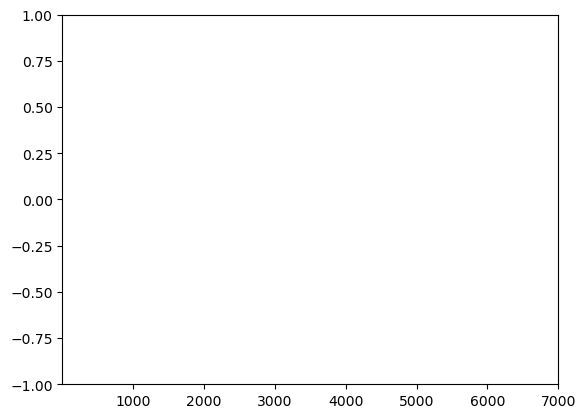

In [8]:
autocorrelation_plot(actual)
pyplot.show()

In [ ]:
autocorrelation_plot(syn)
pyplot.show()

## ARIMA

In [ ]:
c1_copy = actual.copy(deep=True)
c2_copy = syn.copy(deep=True)

In [ ]:
c1_copy.index = c1_copy.index.to_period('s')
c1_copy.index

In [ ]:
#concat_two.index = concat_two.index.to_timestamp(freq='s')
c2_copy.index = c2_copy.index.to_period('s')
c2_copy.index

In [ ]:
model = ARIMA(c2_copy, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
model = ARIMA(c1_copy, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

## Histograms

array([[<AxesSubplot:title={'center':'longterm'}>]], dtype=object)

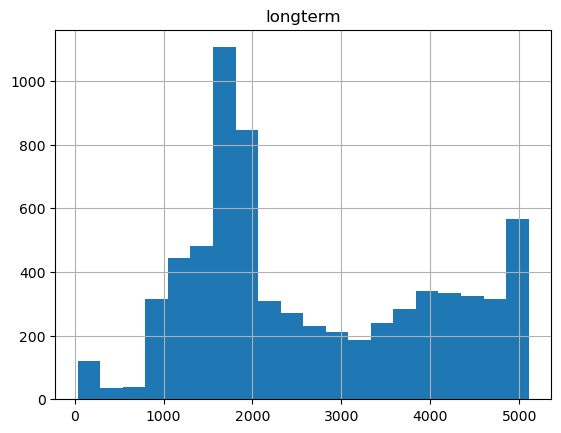

In [33]:
actual.hist(column="longterm", bins=20)

array([[<AxesSubplot:title={'center':'longterm'}>]], dtype=object)

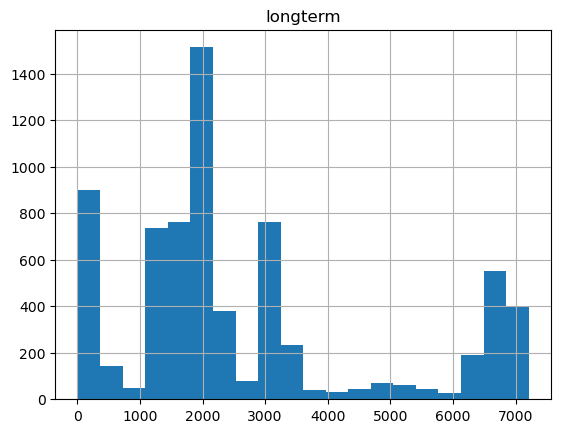

In [34]:
syn.hist(column="longterm", bins=20)

# Compute Probabilities

In [ ]:
import seaborn as sns
concat_one['value'] = concat_one['value'].round(decimals=0)
probabilities_one = concat_one['value'].value_counts(normalize=True)
sns.barplot(x=probabilities_one.index, y=probabilities_one.values, color='blue')
#probabilities

In [ ]:
import seaborn as sns
concat_two['value'] = concat_two['value'].round(decimals=0)
probabilities_two = concat_two['value'].value_counts(normalize=True)
sns.barplot(x=probabilities_two.index, y=probabilities_two.values, color='blue')

# Comparative Analysis

## Dynamic Time Warping

## Interpretation
Dynamic time warping is a seminal time series comparison technique.The objective of time series comparison methods is to produce a distance metric between two input time series. The similarity or dissimilarity of two-time series is typically calculated by converting the data into vectors and calculating the Euclidean distance between those points in vector space.

In [11]:
import numpy as np 
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
#x = concat_one.to_numpy()
#y = concat_two.to_numpy()
#distance, path = fastdtw(x,y, dist=euclidean)
#print(distance)

In [9]:
actual2 = pd.read_csv('/home/sridhar/DataAnalysis/pod18-node5/load/load-2022-06-19', index_col=False) 
diff = actual2.shape[0] - syn.shape[0]
print(diff)
actual2 = actual2.drop(actual2.index[(actual2.shape[0] - diff):])
actual2.shape[0]

539


7000

In [12]:
from scipy.spatial.distance import chebyshev, cityblock
values_one = actual[['longterm']].to_numpy()
values_two = syn[['longterm']].to_numpy()
dist, path = fastdtw(values_one, values_two, dist=euclidean)
print(dist)

7397003.302666678


In [13]:
from scipy.spatial.distance import chebyshev, cityblock
values_one = actual[['longterm']].to_numpy()
values_two = actual2[['longterm']].to_numpy()
dist, path = fastdtw(values_one, values_two, dist=euclidean)
print(dist)

3769229.299999991


# Wasserstein Distance

## Interpretation
Wasserstein distance provide a meaningful and smooth representation of the distance between distributions. They measure the minimal effort required to reconfigure the probability mass of one distribution in order to recover the other distribution.
Expectation: Less than 2.

In [14]:
from scipy.stats import wasserstein_distance
wd = wasserstein_distance (actual['longterm'], syn['longterm'])
wd

666.5970673333333

In [15]:
wd2 = wasserstein_distance (actual['longterm'], actual2['longterm'])
wd2

82.6613057142857

# Maximum Mean Discrepancy

## Reference
https://www.kaggle.com/code/onurtunali/maximum-mean-discrepancy/notebook

## Interpretation
MMD is defined by the idea of representing distances between distributions as distances between mean embeddings of features. Two distributions are similar if their moments are similar. By applying a kernel, we can transform the variable such that all moments (first, second, third etc.) are computed. In the latent space we can compute the difference between the moments and average it. This gives a measure of the similarity/dissimilarity between the datasets.

In [ ]:
import torch

def MMD(x, y, kernel):
    """Emprical maximum mean discrepancy. The lower the result
       the more evidence that distributions are the same.

    Args:
        x: first sample, distribution P
        y: second sample, distribution Q
        kernel: kernel type such as "multiscale" or "rbf"
    """
    xx, yy, zz = torch.mm(x, x.t()), torch.mm(y, y.t()), torch.mm(x, y.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
    
    dxx = rx.t() + rx - 2. * xx # Used for A in (1)
    dyy = ry.t() + ry - 2. * yy # Used for B in (1)
    dxy = rx.t() + ry - 2. * zz # Used for C in (1)
    
    XX, YY, XY = (torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device))
    
    if kernel == "multiscale":
        
        bandwidth_range = [0.2, 0.5, 0.9, 1.3]
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
            
    if kernel == "rbf":
      
        bandwidth_range = [10, 15, 20, 50]
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)
      
      

    return torch.mean(XX + YY - 2. * XY)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import dirichlet 
from torch.distributions.multivariate_normal import MultivariateNormal

device = "cpu"

m = 20 # sample size
x_mean = torch.zeros(2)+1
y_mean = torch.zeros(2)
x_cov = 2*torch.eye(2) # IMPORTANT: Covariance matrices must be positive definite
y_cov = 3*torch.eye(2) - 1

px = MultivariateNormal(x_mean, x_cov)
qy = MultivariateNormal(y_mean, y_cov)
#x = px.sample([m]).to(device)
#y = qy.sample([m]).to(device)

x = torch.from_numpy(concat_one.values).float().to(device)
y = torch.from_numpy(concat_two.values).float().to(device)
print(x.t())
print(y.t())
print(type(x))
result = MMD(x, y, kernel="multiscale")

print(f"MMD result of X and Y is {result.item()}")

# Root mean square difference

## Interpretation
The closer RMSE is to 0, the more similar the generated data is to the real-data. But RMSE is returned on the same scale as the target we are emulating for and therefore there isn’t a general rule for how to interpret ranges of values.
For CPU usage,  If it is more than 30, then we may have to relook at it.

In [16]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(actual['longterm'], syn['longterm'], squared = False)

In [17]:
print(rmse)

1753.776630680174


In [18]:
rmse2 = mean_squared_error(actual['longterm'], actual2['longterm'], squared = False)
rmse2

118.39800115735547

In [ ]:
rmse3 = mean_squared_error(concat_one.sort_values(by='value')['value'], concat_two.sort_values(by='value')['value'], squared = False)
print(rmse3)

# Mutual Information

## Interpretation
Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. High mutual information indicates a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables means the variables are independent. The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

Should be 1.5+

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
discrete_features = concat_one.dtypes == int

In [ ]:
mi_scores = make_mi_scores(concat_one, concat_two['value'], discrete_features)

In [ ]:
print(mi_scores)